# Stereo Imaging

In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from matplotlib.pyplot import figure

Left Image: (375, 450)                Right Image: (375, 450)


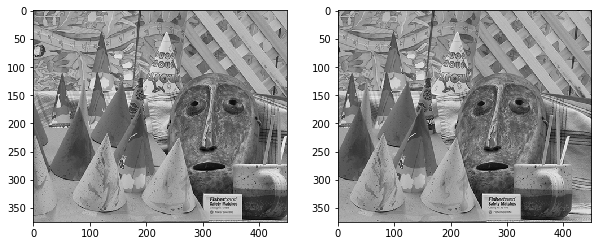

In [2]:
imgL  = cv2.imread('left (1).png',0)
imgR = cv2.imread('right (1).png',0)

figure(figsize=(10,10))
plt.subplot(121);plt.imshow(imgL,cmap='gray')
plt.subplot(122);plt.imshow(imgR,cmap='gray')

print('Left Image:',imgL.shape,'               Right Image:',imgR.shape)

#### Crop the image for easy processing

In [3]:
left = imgL[:370][:]
right = imgR[:370][:]

In [4]:
width = 5 # Window size = 11 => 5 + 1 + 5
disparity1 = np.zeros(left.shape)

for y_l in range(width,left.shape[0]-width):
    for x_l in range(width,left.shape[1]-width):
       
        minimum = 26000

        left_snip = left[y_l-width : y_l+width , x_l-width : x_l+width] # Template from left image
        
        for x_r in range(width,right.shape[1]-width):
                
            right_snip = right[y_l-width : y_l+width , x_r-width : x_r+width] # From right image
            
            sad = np.sum(np.absolute(left_snip - right_snip)) # SAD - sum of absolute differences
                
            if sad < minimum:
                minimum = sad
                    
                colour = np.absolute(x_r - x_l)
                    
        disparity1[y_l:(y_l+width),x_l:(x_l+width)] = colour

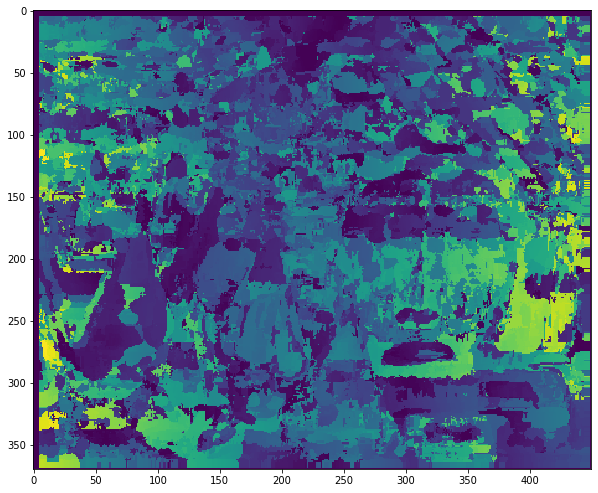

In [5]:
disparity2 = 255 * (disparity1 - np.min(disparity1))/(np.max(disparity1) - np.min(disparity1))
figure(figsize=(10,10))
plt.imshow(disparity2)

This is not noise in image. Its image in noise !

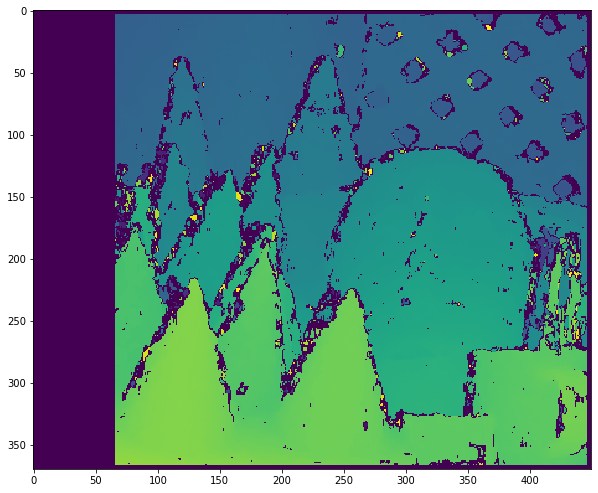

In [25]:
stereo = cv2.StereoBM_create(numDisparities=64, blockSize=7)
disparity = stereo.compute(left,right)

figure(figsize=(10,10))
plt.imshow(disparity)
plt.show()

#### Conclusion:
1. The simple box compare method is no close to the inbulit function StereoBM_create of OpenCV <br>
2. Closer the object,more disparity,more brighter
3. Farther the object,less disparity, more darker